<a href="https://colab.research.google.com/github/motazalratta/de-assessments/blob/main/Phase3/notebooks/ETL_Latency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Authentication

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from google.colab import auth
from google.cloud.bigquery import magics

magics.context.project = 'analog-patrol-311615'

auth.authenticate_user()
print('Authenticated')

Authenticated


# ETL Latency

In [3]:
#@title Transactions DataFlow Pipeline Consume Latency
%%bigquery  subscriber_consume_latency
SELECT
  md_inserttime,
  ROUND(AVG(subscriberlatency),2) avgsubscriberlatency
FROM (
  SELECT
    DATETIME_TRUNC(md_inserttime, SECOND) md_inserttime,
    TIMESTAMP_DIFF(md_inserttime, md_publishtime, SECOND) subscriberlatency
  FROM
    `assessmentdb.transactions` )
GROUP BY
  md_inserttime
ORDER BY
  md_inserttime;

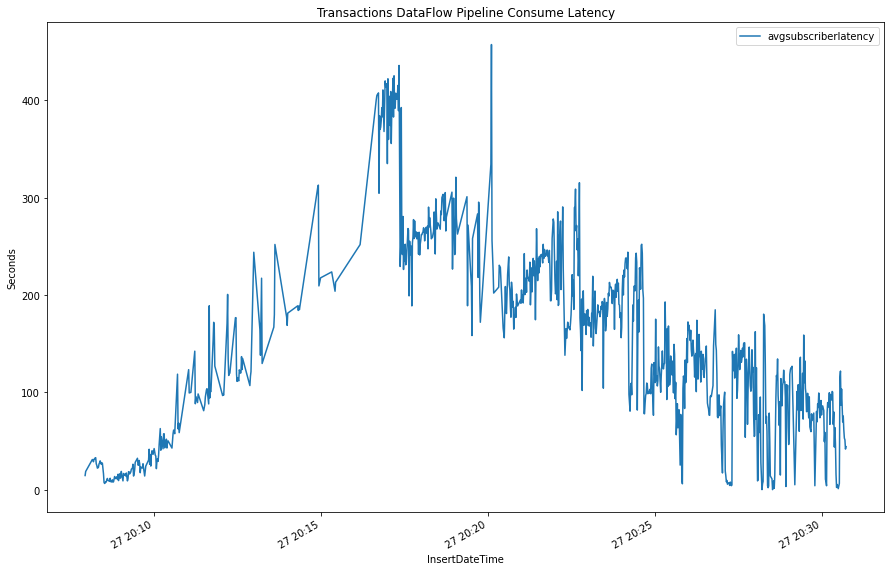

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
subscriber_consume_latency.plot(x = 'md_inserttime', y = 'avgsubscriberlatency', rot = 40, ax = ax)
ax.set(xlabel="InsertDateTime",
       ylabel="Seconds",
       title="Transactions DataFlow Pipeline Consume Latency")
plt.setp(ax.get_xticklabels(), rotation=30)
plt.show()

In [ ]:
#@title Transactions DataFlow Pipeline Consume Distribution
%%bigquery subscriber_consume_latency_dist
SELECT
  subscriberlatency,
  count(*) count
FROM (
  SELECT
    TIMESTAMP_DIFF(md_inserttime, md_publishtime, SECOND) subscriberlatency
  FROM
    `assessmentdb.transactions` )
GROUP BY
  subscriberlatency
ORDER BY
  subscriberlatency;

In [ ]:
fig, ax = plt.subplots(figsize=(7, 7))
 
ax.bar(subscriber_consume_latency_dist['subscriberlatency'],
        subscriber_consume_latency_dist['count'],
        color='blue')
 
ax.set(xlabel="Seconds",
       ylabel="Count of Consumeed Transactions",
       title="Transactions DataFlow Pipeline Consume Distribution")
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()